### Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

In [ ]:
file = "/content/drive/MyDrive/Colab Notebooks/projects/diabetes prediction/diabetes.csv"
data = pd.read_csv(file)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df = data.copy()

- as we have alredy seen in the analysis there is no null value present in our dataset.
- so let us use Sqrt transformation to transform all the right skewed data into normal distribution

In [ ]:
df.columns = df.columns.str.lower()
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [ ]:
continuos_features = [feature for feature in df.columns if len(df[feature].unique())>25]
continuos_features

['glucose',
 'bloodpressure',
 'skinthickness',
 'insulin',
 'bmi',
 'diabetespedigreefunction',
 'age']

In [ ]:
for features in continuos_features:
  print("skew of",features,":%f" % df[features].skew())

skew of glucose :0.173754
skew of bloodpressure :-1.843608
skew of skinthickness :0.109372
skew of insulin :2.272251
skew of bmi :-0.428982
skew of diabetespedigreefunction :1.919911
skew of age :1.129597


- we have insulin,diabetespedegreefunction an skinthickness somewhat right skewed

In [ ]:
def log_continuos(feature):
  plt.figure(figsize =(13,5))
  plt.subplot(1,2,1)
  sns.distplot(df[feature],fit=norm)
  plt.title("Before log transformation")

  plt.subplot(1,2,2)
  df[feature] = np.sqrt(df[feature])
  sns.distplot(df[feature],fit=norm)
  plt.title("After log transformation")
  plt.show()

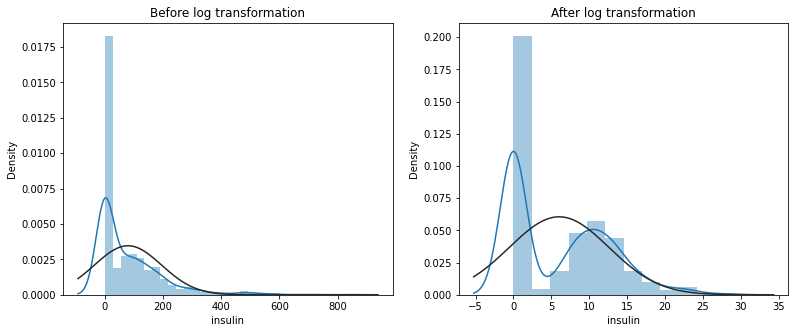

In [ ]:
log_continuos('insulin')

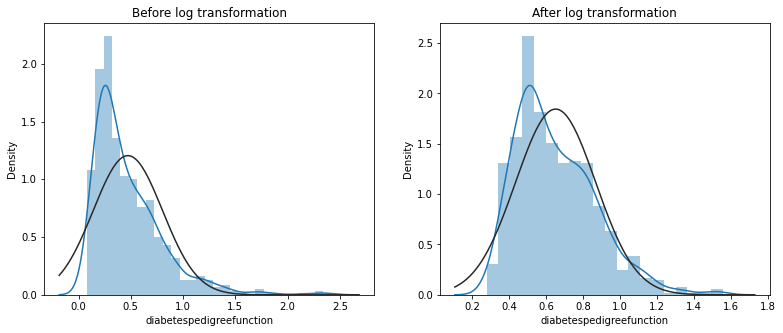

In [ ]:
log_continuos('diabetespedigreefunction')

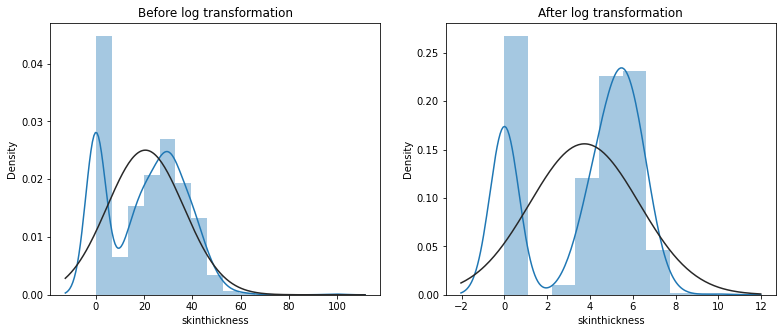

In [ ]:
log_continuos('skinthickness')

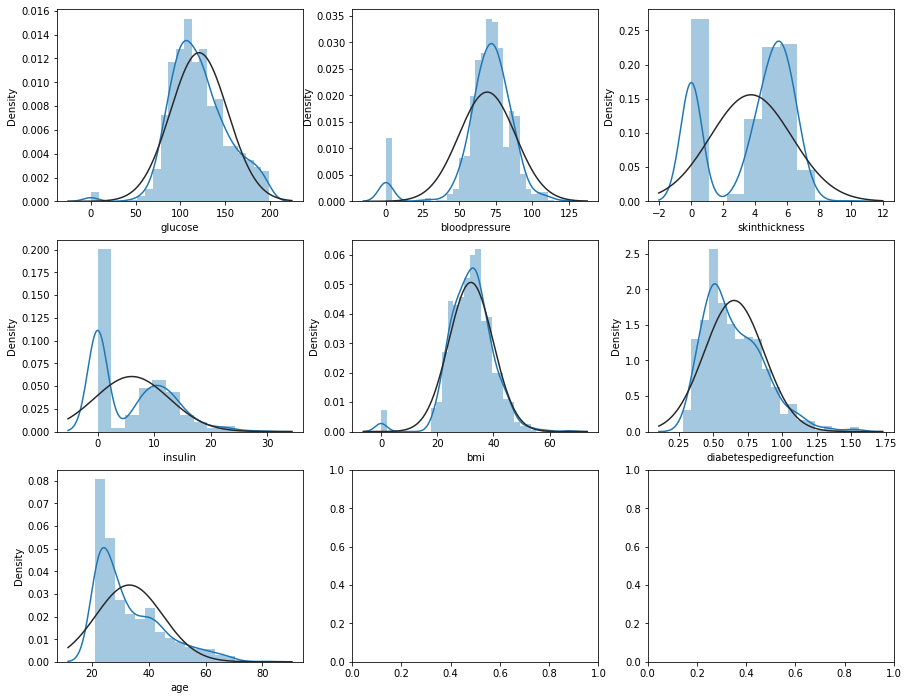

In [ ]:
fig,ax = plt.subplots(3,3,figsize=(15,12))
for variable, subplot in zip(continuos_features,ax.flatten()):
  sns.distplot(df[variable],ax=subplot,fit=norm)

#### Selecting the dependent variable and independent variables

In [ ]:
X= df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
print(X.shape)
print(y.shape)

(768, 8)
(768,)


### Train-test-split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Training on Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state =0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

### Predicting on the test set

In [ ]:
y_pred = classifier.predict(X_test)
dataset = np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)
result = pd.DataFrame(dataset,columns=['predicted','Actual'])
result.head()

,predicted,Actual
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0


### Confusion matrix and accuracy score

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm =confusion_matrix(y_pred,y_test)
acs =accuracy_score(y_pred,y_test)

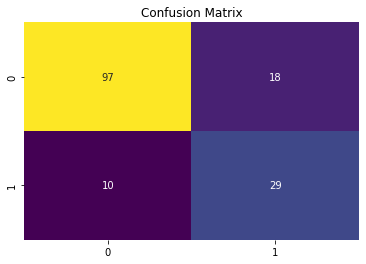

In [ ]:
sns.heatmap(cm,annot=True,cmap='viridis',cbar=False)
plt.title('Confusion Matrix');

In [ ]:
print(acs)

0.8181818181818182


#### Cross-Validation-score

In [ ]:
from sklearn.model_selection import cross_val_score
cross = cross_val_score(classifier,X,y,cv=5)
print("cross validation is:", np.mean(cross)*100)

cross validation is: 75.78558696205755


#### After testing our dataset on various models below are the accuracies.

In [ ]:
results = pd.DataFrame({'Algorithm':['LOGISTIC','SVM','KERNEL SVM','NAIVE BAYES','KNN','DECISION TREE','RANDOM FOREST'],
                        'Accuracy(%)':[81.81,81.81,79.22,79,77.9,70,79]})
results.style.hide_index()

Algorithm,Accuracy(%)
LOGISTIC,81.810000
SVM,81.810000
KERNEL SVM,79.220000
NAIVE BAYES,79.000000
KNN,77.900000
DECISION TREE,70.000000
RANDOM FOREST,79.000000


##### Here comes the burning question we all ask when building any model and after seeing its accuracy

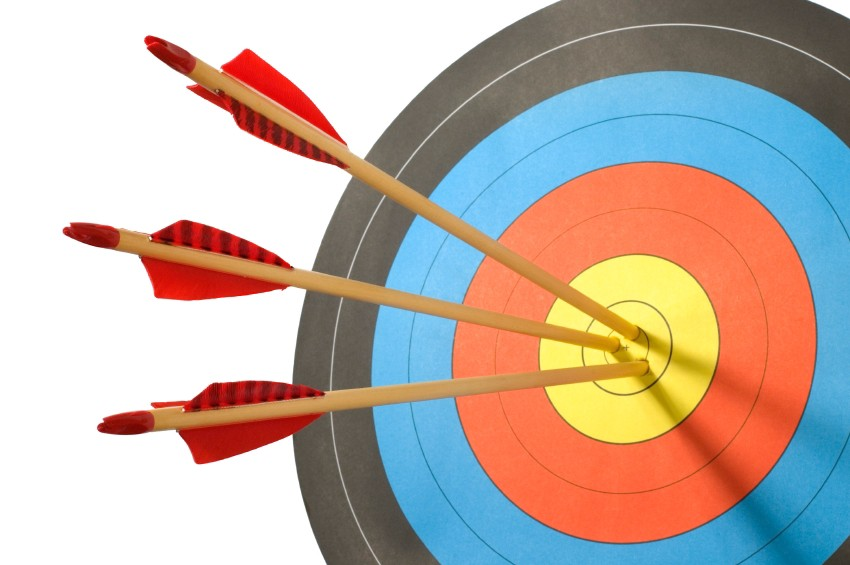

### HOW CAN I IMPROVE IT?

well there are various things we can do:

- some of our data has 0 value in it we can impute those values with the mean and check if it has any impact
- creating a new features by binning some of the columns
- Next time you visit a doctor ask him/her what do they check to conclude a patient is diabetic or not.
